In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
'''
price는 주택가격임
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\nprice는 주택가격임\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

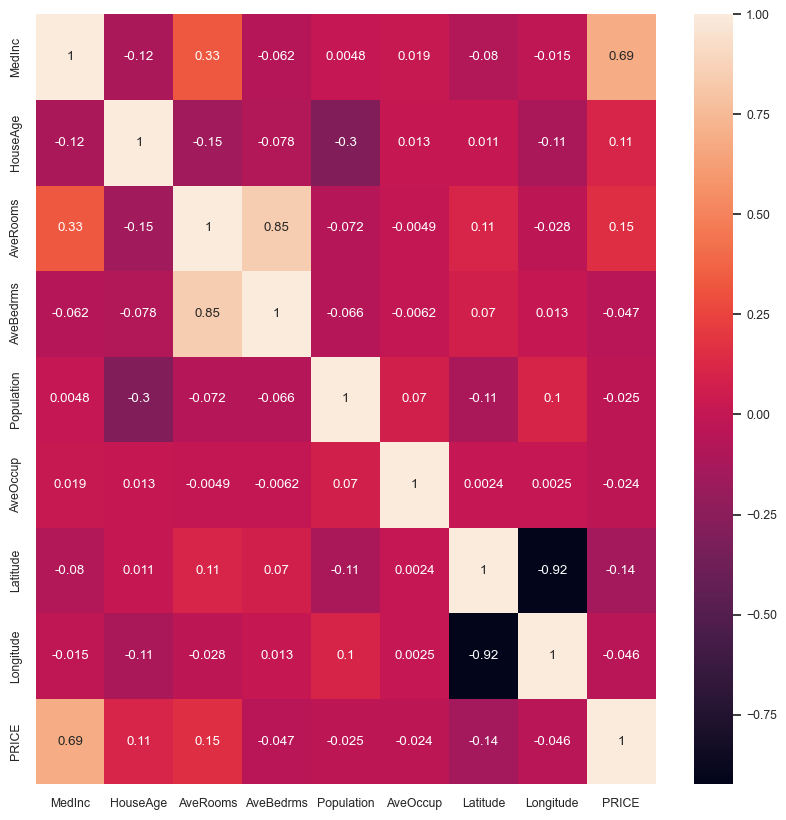

In [4]:
#상관 관계 행렬
# -1~1까지 있고 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr() #df를 상관관계 행렬화해서 df_corr에 저장

#히트맵
plt.figure(figsize=(10,10)) #히트맵의 크기를 10x10
sns.set(font_scale=0.8) #히트맵의 폰트크기 조정
sns.heatmap(df_corr, annot=True, cbar=True) #각 셀에 상관계수 값을 표시(annot=True), 색상 막대(cbar)를 표시
plt.show()

# PRICE와 상관관계 높은 건  MedInc 0.69

In [5]:

from sklearn.model_selection import train_test_split #훈련, 테스트 데이터 나누기
from sklearn.linear_model import LinearRegression #선형회귀(regression에서는 로지스틱 회귀 대신에 선형회귀를 사용함.)
from sklearn.metrics import mean_squared_error, r2_score #mse가 작을수록 성능이 좋고 R2 스코어가 1에 가까울 수록 성능이 좋음


In [6]:

X = df.drop('PRICE',axis=1) #가격을 예측할 거라서 가격 레이블을 떼어버림
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12) #X는 입력데이터(특성 혹은 특성들. 테이블의 열), y는 정답값(레이블)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#ex. 훈련 세트 :(16512, 8) (16512,)
#X_train.shape = (16512, 8): X_train은 16,512개의 샘플(데이터 행)과 8개의 특징(열)
#y_train.shape = (16512,):y_train은 16,512개의 정답값(레이블)을 나타냄. 근데 (정답갑, 정답값의 개수)로 여기는 정답갑의 개수가 딱 하나인거임, 다중 출력이나 다중 레이어 문제가 아니라서

(16512, 8) (16512,)
(4128, 8) (4128,)


## Linear regression

In [9]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

###########################똑같은 결과가 나오는데 Numpy를 사용한 MSE 계산 (직접 계산)##########################
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))
##############################################################################################################

###########################똑같은 결과가 나오는데 파이썬 기본 연산으로 MSE 계산 (완전 수작업 방식)##############
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))
###############################################################################################################

평균제곱근오차 0.5269927956248035
평균제곱근오차 0.5269927956248035
평균제곱근오차 0.5269927956248031


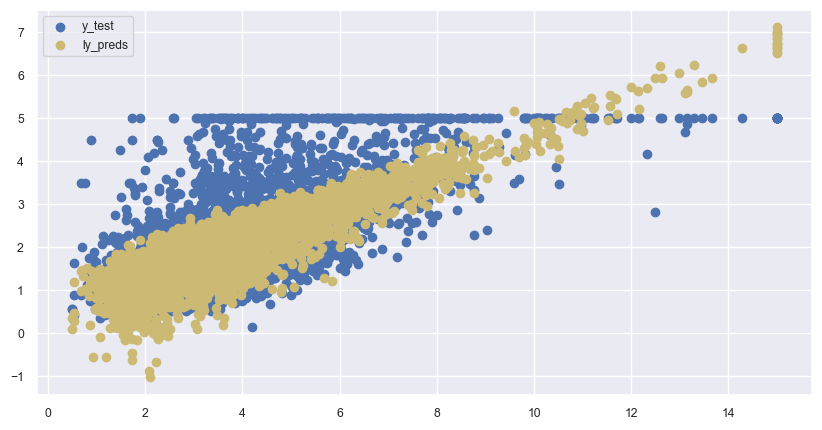

In [15]:
# 예측값과 실제 값 차이를 산접도(scatter)로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test') #X_test['MedInc']: 중위 소득(MedInc)을 x축에 놓습니다. y_test: 실제 주택 가격을 y축에 놓습니다.
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
    #X_test['MedInc']: 중위 소득(MedInc)을 x축에 놓습니다. ly_preds: 모델이 예측한 주택 가격을 y축에 놓습니다. c='y': 점들의 색상을 노란색으로 지정합니다

#plt.plot(X_train, model.predict(X_train), color='red') 학습된 선형 회귀 모델이 훈련 데이터(X_train)에서 어떻게 예측하는지 회귀선을 그릴 수 있음
plt.legend() #범례
plt.show()

#scatter에서 label은 범례 이름일 뿐임

## Random Forest (시간 조금 걸림)

In [18]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.2516242433784686


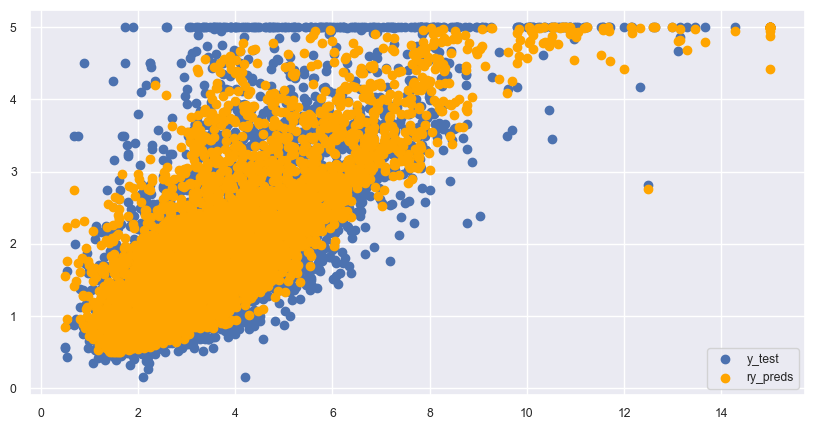

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test') #실제값
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds') #예측값

plt.legend() #범례 추가하는 거 label에 해당하는 것들 말임.
plt.show()

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.47147437234469475


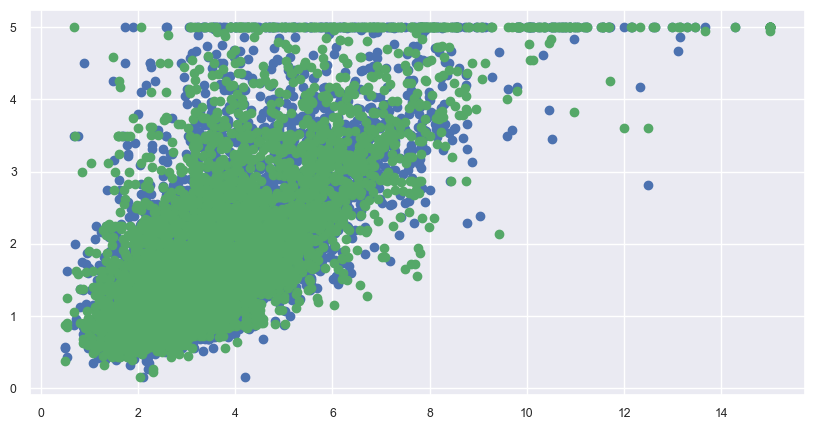

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()        

## KNN (K-Nearest Neighbors, K 최근접 이웃) classification

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KNN 모델 생성 및 학습
model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors=5는 기본값으로, K값을 설정
model.fit(X_train, y_train)

# 예측
knn_preds = model.predict(X_test)

# 평균 제곱 오차(MSE) 계산
print('평균제곱근오차', mean_squared_error(knn_preds, y_test))


평균제곱근오차 1.1557853715421391


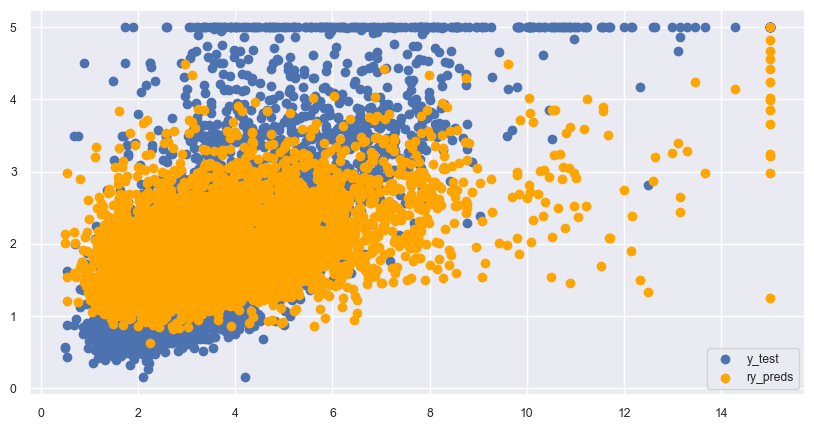

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test') #실제값
plt.scatter(X_test['MedInc'], knn_preds, c='orange', label='ry_preds') #예측값

plt.legend() #범례 추가
plt.show()

## SVM

In [12]:
#SVR 계산 시간이 오래 걸림 그래서 결과를 못 봄

from sklearn.svm import SVR

#model = SVR(kernel='linear') #비선형 관계는 kernel='rbf' 많이 씀
#model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

#ry_preds = model.predict(X_test)
#print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()    